In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('train.csv')

In [3]:
dataframe.columns

Index(['sale_id', 'sale_date', 'borough', 'neighborhood',
       'building_class_category', 'tax_class_at_present', 'block', 'lot',
       'ease-ment', 'building_class_at_present', 'address', 'apartment_number',
       'zip_code', 'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price'],
      dtype='object')

In [4]:
dataframe = dataframe.drop(['ease-ment', 'sale_id', 'apartment_number'], axis=1)

In [5]:
els = dataframe['sale_date']

for el in els:
    s = el.split('/')
    if len(s) != 3:
        print('oi')

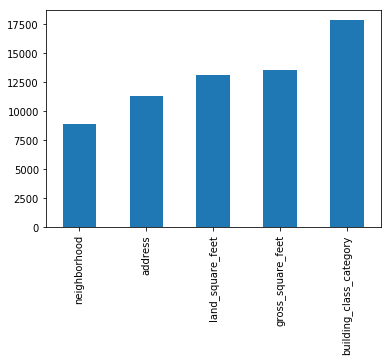

In [6]:
dataframe = dataframe.replace(to_replace='-', value=np.nan, regex=True)
plote = dataframe.isnull().sum()
plote = plote[plote > 0]
plote.sort_values(inplace=True)
plote.plot.bar()
plt.show()

In [7]:
dataframe['neighborhood'].fillna(dataframe['neighborhood'].mode()[0], inplace=True)
dataframe['building_class_category'].fillna(dataframe['building_class_category'].mode()[0], inplace=True)
dataframe['address'].fillna(dataframe['address'].mode()[0], inplace=True)
dataframe['land_square_feet'].fillna(dataframe['land_square_feet'].mode()[0], inplace=True)
dataframe['gross_square_feet'].fillna(dataframe['gross_square_feet'].mode()[0], inplace=True)
dataframe['building_class_category'].fillna(dataframe['building_class_category'].mode()[0], inplace=True)

dataframe['sale_date'] = pd.to_datetime(dataframe.sale_date, format='%m/%d/%y').astype(int)

In [8]:
plote = dataframe.isnull().sum()
plote

sale_date                         0
borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
dtype: int64

In [9]:
dataframe

,sale_date,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price
0,1472688000000000000,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,2,373,49,C6,"311 EAST 3RD STREET, 17",10009,0,0,0,0,0,1920,2,C6,450000
1,1472688000000000000,4,CORONA,01 ONE FAMILY DWELLINGS,2,1946,1,D4,"9906 58TH AVENUE, 1E",11368,0,0,0,0,0,1962,2,D4,158000
2,1472688000000000000,4,CORONA,01 ONE FAMILY DWELLINGS,2,1908,1,D4,429 KENT AVENUE,11368,0,0,0,0,0,1965,2,D4,233900
3,1472688000000000000,4,CORONA,01 ONE FAMILY DWELLINGS,2A,1987,53,C2,429 KENT AVENUE,11368,6,0,6,2500,3750,1990,2,C2,1265000
4,1472688000000000000,4,CORONA,02 TWO FAMILY DWELLINGS,1,1770,2,B3,429 KENT AVENUE,11368,2,0,2,1685,1588,1925,1,B3,1070000
5,1472688000000000000,4,CORONA,01 ONE FAMILY DWELLINGS,1,1724,26,A1,429 KENT AVENUE,11368,1,0,1,2000,1824,1901,1,A1,446160
6,1472688000000000000,4,COLLEGE POINT,04 TAX CLASS 1 CONDOS,1A,4019,1108,R3,429 KENT AVENUE,11356,1,0,1,0,0,0,1,R3,490000
7,1472688000000000000,4,DOUGLASTON,01 ONE FAMILY DWELLINGS,2,8092,28,D4,429 KENT AVENUE,11363,0,0,0,0,0,1963,2,D4,215000
8,1472688000000000000,4,COLLEGE POINT,04 TAX CLASS 1 CONDOS,1A,3916,1454,R3,429 KENT AVENUE,11356,1,0,1,0,0,0,1,R3,435000
9,1472688000000000000,4,CAMBRIA HEIGHTS,01 ONE FAMILY DWELLINGS,1,11307,38,A2,429 KENT AVENUE,11411,1,0,1,4000,1185,1935,1,A2,300000


In [10]:
# bobrough, neighborhood, building_class_category, tax_class, buildin_class, adress, tax_class_at_ime_ofsale_building_class_at_time

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
datafram = pd.concat([dataframe, pd.get_dummies(dataframe['borough'])], axis=1);
datafram = pd.concat([dataframe, pd.get_dummies(dataframe['neighborhood'])], axis=1);
datafram = pd.concat([dataframe, pd.get_dummies(dataframe['building_class_category'])], axis=1);
datafram = pd.concat([dataframe, pd.get_dummies(dataframe['tax_class_at_present'])], axis=1);
datafram = pd.concat([dataframe, pd.get_dummies(dataframe['building_class_at_present'])], axis=1);
datafram = pd.concat([dataframe, pd.get_dummies(dataframe['tax_class_at_time_of_sale'])], axis=1);
datafram = pd.concat([dataframe, pd.get_dummies(dataframe['building_class_at_time_of_sale'])], axis=1);
datafram = datafram.drop(['address', 'borough', 'neighborhood', 'building_class_category', 'tax_class_at_present', 'building_class_at_present', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale'], axis=1)
datafram

,sale_date,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,...,W2,W3,W4,W8,W9,Y1,Y3,Z0,Z2,Z9
0,1472688000000000000,373,49,10009,0,0,0,0,0,1920,...,0,0,0,0,0,0,0,0,0,0
1,1472688000000000000,1946,1,11368,0,0,0,0,0,1962,...,0,0,0,0,0,0,0,0,0,0
2,1472688000000000000,1908,1,11368,0,0,0,0,0,1965,...,0,0,0,0,0,0,0,0,0,0
3,1472688000000000000,1987,53,11368,6,0,6,2500,3750,1990,...,0,0,0,0,0,0,0,0,0,0
4,1472688000000000000,1770,2,11368,2,0,2,1685,1588,1925,...,0,0,0,0,0,0,0,0,0,0
5,1472688000000000000,1724,26,11368,1,0,1,2000,1824,1901,...,0,0,0,0,0,0,0,0,0,0
6,1472688000000000000,4019,1108,11356,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1472688000000000000,8092,28,11363,0,0,0,0,0,1963,...,0,0,0,0,0,0,0,0,0,0
8,1472688000000000000,3916,1454,11356,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1472688000000000000,11307,38,11411,1,0,1,4000,1185,1935,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

X = datafram.drop(['sale_price'], axis=1)
y = datafram['sale_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(len(x_train))

30536


In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

print('R2 score: {}'.format(model.score(x_test, y_test)))
print(cross_val_score(model,x_test, y_test,scoring='r2'))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.6765202361718994
[0.52471205 0.1110244  0.34625758]
MAE: 787360.448214968
